# LeNet

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras import Model
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 使用 GPU 1
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")

In [2]:
# dataset
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train_shape: ', x_train.shape)
print('y_train_shape: ', y_train.shape)
print('x_test_shape: ', x_test.shape)
print('y_test_shape: ', y_test.shape)

x_train_shape:  (50000, 32, 32, 3)
y_train_shape:  (50000, 1)
x_test_shape:  (10000, 32, 32, 3)
y_test_shape:  (10000, 1)


In [4]:
# 归一化
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# model
class LeNetModel(Model):
    def __init__(self, fileter1 = 6, kernel_size1 = (5,5), stride1 = 1, padding_mode1 = 'valid',
                 max_pool_kernel_1 = (2,2), max_pool_stride_1 = 2, max_pool_padding1 = 'valid',
                 fileter2 = 16, kernel_size2 = (5,5), stride2 = 1, padding_mode2 = 'valid',
                 max_pool_kernel_2 = (2,2), max_pool_stride_2 = 2, max_pool_padding2 = 'valid',
                 hidden1 = 120, hidden2 = 84, classes = 10):
        super(LeNetModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=fileter1, kernel_size=kernel_size1, strides=stride1, padding=padding_mode1, activation='sigmoid')
        self.max_pool1 = keras.layers.MaxPool2D(pool_size=max_pool_kernel_1,strides=max_pool_stride_1,padding=max_pool_padding1)
        self.conv2 = keras.layers.Conv2D(filters=fileter2, kernel_size=kernel_size2, strides=stride2, padding=padding_mode2, activation='sigmoid')
        self.max_pool2 = keras.layers.MaxPool2D(pool_size=max_pool_kernel_2, strides=max_pool_stride_2, padding=max_pool_padding2)
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(units=hidden1,activation='sigmoid')
        self.d2 = keras.layers.Dense(units=hidden2, activation='sigmoid')
        self.d3 = keras.layers.Dense(units=classes, activation='softmax')

    def call(self, inputs, training=None, mask=None):
        # inputs [batch_size, height, width, channel] = [batch, 32, 32, 3]
        x = self.conv1(inputs)
        # [batch_size, height - kernel + 1, width - kernel + 1, filter] = [batch_size, 28, 28, 6]
        x = self.max_pool1(x)
        # [batch_size, (height - pool_size) / stride + 1, (width - pool_size) / stride + 1, filter] = [batch_size, 14, 14, 6]
        x = self.conv2(x)
        # [batch_size, 10, 10, 16]
        x = self.max_pool2(x)
        # [batch_size, 5, 5, 16]
        x = self.flatten(x)
        # [batch_size, 120]
        x = self.d1(x)
        # [batch_size, 120]
        x = self.d2(x)
        # [batch_size, 84]
        y = self.d3(x)
        # [batch_size, 10]
        return y

In [6]:
LeNet = LeNetModel()

In [7]:
LeNet.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

In [9]:
checkpoint_save_path_lenet = 'tensorflow_study/chapter5/model_dir/simple_model/lenet.ckpt'

cp_callback_lenet = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_save_path_lenet,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode = 'max',
)

In [10]:
history = LeNet.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback_lenet])

Epoch 1/50
782/782 [==============================] - 7s 6ms/step - loss: 2.1406 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.9482 - val_sparse_categorical_accuracy: 0.2729
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8487 - sparse_categorical_accuracy: 0.3128 - val_loss: 1.7378 - val_sparse_categorical_accuracy: 0.3637
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.6914 - sparse_categorical_accuracy: 0.3789 - val_loss: 1.6483 - val_sparse_categorical_accuracy: 0.3955
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5960 - sparse_categorical_accuracy: 0.4134 - val_loss: 1.5361 - val_sparse_categorical_accuracy: 0.4334
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5147 - sparse_categorical_accuracy: 0.4439 - val_loss: 1.4689 - val_sparse_categorical_accuracy: 0.4614
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.4639 - sparse_categorica

# AlexNet

In [31]:
# model
class AlexNetModel(Model):
    def __init__(self):
        super(AlexNetModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=1, padding='valid')
        self.bn1 = keras.layers.BatchNormalization()
        self.act1 = keras.layers.ReLU()
        self.max_pool1 = keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid')

        self.conv2 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='valid')
        self.bn2 = keras.layers.BatchNormalization()
        self.act2 = keras.layers.ReLU()
        self.max_pool2 = keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid')

        self.conv3 = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=1, padding='same', activation='relu')

        self.conv4 = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=1, padding='same', activation='relu')

        self.conv5 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu')
        self.max_pool3 = keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid')

        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(units=2048,activation='relu')
        self.dropout1 = keras.layers.Dropout(0.5)
        self.d2 = keras.layers.Dense(units=2048, activation='relu')
        self.dropout2= keras.layers.Dropout(0.5)
        self.d3 = keras.layers.Dense(units=10, activation='softmax')

    def call(self, inputs, training=None, mask=None):
        # inputs [batch_size, height, width, channel] = [batch, 32, 32, 3]
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act1(x)
        # [batch_size, height, width, filter] = [batch_size, 30, 30, 96]
        x = self.max_pool1(x)
        # [batch_size, (height - pool_size) / stride + 1, (width - pool_size) / stride + 1, filter] = [batch_size, 14, 14, 96]


        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        # [batch_size, 12, 12, 256]
        x = self.max_pool2(x)
        # [batch_size, 5, 5, 256]

        x = self.conv3(x)
        # [batch_size, 5, 5, 256]

        x = self.conv4(x)
        # [batch_size, 5, 5, 256]

        x = self.conv5(x)
        # [batch_size, 5, 5, 256]
        x = self.max_pool3(x)
        # [batch_size, 2, 2, 256]

        x = self.flatten(x)
        x = self.d1(x)
        x = self.dropout1(x)
        # [batch_size, 2048]
        x = self.d2(x)
        x = self.dropout2(x)
        # 【batch_size, 2048]
        y = self.d3(x)
        return y

In [32]:
alexNet = AlexNetModel()

In [33]:
alexNet.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

In [34]:
checkpoint_save_path_alexnet = 'tensorflow_study/chapter5/model_dir/simple_model/alexnet_{epoch:02d}-{val_loss:.2f}.ckpt'

cp_callback_alexnet = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_save_path_alexnet,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
)

In [35]:
history_alex = alexNet.fit(x_train, y_train,batch_size=256,epochs=20,validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback_alexnet])

Epoch 1/20
196/196 [==============================] - 7s 34ms/step - loss: 1.6776 - sparse_categorical_accuracy: 0.3789 - val_loss: 4.9303 - val_sparse_categorical_accuracy: 0.1008
Epoch 2/20
196/196 [==============================] - 4s 19ms/step - loss: 1.1903 - sparse_categorical_accuracy: 0.5745 - val_loss: 3.6366 - val_sparse_categorical_accuracy: 0.1922
Epoch 3/20
196/196 [==============================] - 4s 19ms/step - loss: 0.9922 - sparse_categorical_accuracy: 0.6509 - val_loss: 1.4674 - val_sparse_categorical_accuracy: 0.5209
Epoch 4/20
196/196 [==============================] - 3s 18ms/step - loss: 0.8664 - sparse_categorical_accuracy: 0.6994 - val_loss: 1.5129 - val_sparse_categorical_accuracy: 0.5154
Epoch 5/20
196/196 [==============================] - 4s 19ms/step - loss: 0.7769 - sparse_categorical_accuracy: 0.7317 - val_loss: 1.2860 - val_sparse_categorical_accuracy: 0.6069
Epoch 6/20
196/196 [==============================] - 4s 19ms/step - loss: 0.7055 - sparse_cate

In [53]:
alexNet.summary()

Model: "alex_net_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          multiple                  2688      
                                                                 
 batch_normalization_7 (Batc  multiple                 384       
 hNormalization)                                                 
                                                                 
 re_lu_6 (ReLU)              multiple                  0         
                                                                 
 max_pooling2d_11 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          multiple                  221440    
                                                                 
 batch_normalization_8 (Batc  multiple            

In [36]:
acc_alex = history_alex.history['sparse_categorical_accuracy']
val_acc_alex = history_alex.history['val_sparse_categorical_accuracy']
loss_alex = history_alex.history['loss']
val_loss_alex = history_alex.history['val_loss']

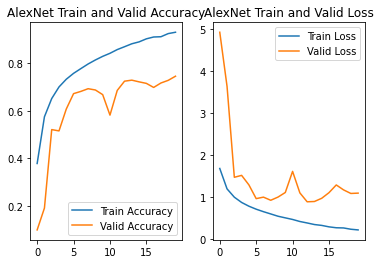

In [37]:
plt.subplot(1,2,1)
plt.plot(acc_alex, label = 'Train Accuracy')
plt.plot(val_acc_alex, label = 'Valid Accuracy')
plt.title('AlexNet Train and Valid Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss_alex, label = 'Train Loss')
plt.plot(val_loss_alex, label = 'Valid Loss')
plt.title('AlexNet Train and Valid Loss')
plt.legend()
plt.show()

# InceptionNet

In [40]:
class ConvBNRelu(Model):
    def __init__(self, filters, kernel_size, stride, padding_mode):
        super(ConvBNRelu, self).__init__()
        self.model = keras.models.Sequential([
            keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding=padding_mode),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('relu'),
        ])
    def call(self, inputs, training=None, mask=None):
        x = self.model(inputs)
        return x

In [42]:
class InceptionBlock(Model):
    def __init__(self, filters, stride):
        super(InceptionBlock, self).__init__()
        self.filters = filters # 所有conv的filter个数
        self.stride = stride # 四个1*1卷积核的步长

        self.Inception1 = ConvBNRelu(filters=self.filters, kernel_size = (1,1), stride=self.stride, padding_mode='same')
        self.Inception2 = keras.models.Sequential([
            ConvBNRelu(filters=self.filters, kernel_size=(1,1), stride=self.stride, padding_mode='same'),
            ConvBNRelu(filters=self.filters, kernel_size=(3,3), stride=1, padding_mode='same'),
        ])
        self.Inception3 = keras.models.Sequential([
            ConvBNRelu(filters=self.filters, kernel_size=(1,1), stride=self.stride, padding_mode='same'),
            ConvBNRelu(filters=self.filters, kernel_size=(5,5), stride=1, padding_mode='same'),
        ])
        self.Inception4 = keras.models.Sequential([
            keras.layers.MaxPool2D(pool_size=(3,3), strides=1, padding='same'),
            ConvBNRelu(filters=self.filters, kernel_size=(1,1), stride=stride, padding_mode='same')
        ])

    def call(self, inputs, training=None, mask=None):
        # inputs [batch, height, width, channel]
        x1 = self.Inception1(inputs)
        x2 = self.Inception2(inputs)
        x3 = self.Inception3(inputs)
        x4 = self.Inception4(inputs)
        # x1, x2, x3, x4前三维维度相同 最后一维是各自的filter个数 [batch, height', width', filter_size_n]
        y = tf.concat([x1,x2,x3,x4], axis=3)
        # 在最后一维即axis=3的维度上进行拼接
        # y [batch, height', width', all_filter_sum]
        return y

In [44]:
class InceptionNet(Model):
    def __init__(self, num_blocks, filters, classes):
        super(InceptionNet, self).__init__()
        self.num_blocks = num_blocks
        self.filters = filters
        self.classes = classes
        self.conv1 = ConvBNRelu(filters=self.filters, kernel_size=(3,3), stride=1, padding_mode='same')
        self.blocks = keras.models.Sequential()


        for block_id in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    each_block = InceptionBlock(filters=self.filters, stride=2)
                else:
                    each_block = InceptionBlock(filters=self.filters, stride=1)
                self.blocks.add(each_block)
            self.filters = self.filters * 2
            # 经过一个stride=2的conv层之后 height和width变为一半 为了保证特征提取效果 将filter个数乘以二
        self.avg_pool = keras.layers.GlobalAveragePooling2D()
        self.output_proj = keras.layers.Dense(self.classes, activation='softmax')

    def call(self, inputs, training=None, mask=None):
        # inputs [batch, height, width, channel]
        x = self.conv1(inputs)
        # [batch, height, width, filters]

        x = self.blocks(x)
        # [batch, height, width, all_filters]
        x = self.avg_pool(x)
        # [batch, all_filters]
        y = self.output_proj(x)
        # [batch, classes]
        return y

In [45]:
InceptionModel = InceptionNet(num_blocks=2, filters=16, classes=10)

In [46]:
InceptionModel.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

In [47]:
checkpoint_save_path_inceptionnet = 'tensorflow_study/chapter5/model_dir/simple_model/inceptionnet_{epoch:02d}-{val_loss:.2f}.ckpt'

cp_callback_inceptionnet = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_save_path_inceptionnet,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
)

In [49]:
history_inception = InceptionModel.fit(x_train, y_train,batch_size=256,epochs=20,validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback_inceptionnet])

Epoch 1/20
196/196 [==============================] - 4s 23ms/step - loss: 1.1565 - sparse_categorical_accuracy: 0.5904 - val_loss: 2.0238 - val_sparse_categorical_accuracy: 0.3484
Epoch 2/20
196/196 [==============================] - 4s 22ms/step - loss: 0.9951 - sparse_categorical_accuracy: 0.6462 - val_loss: 1.2653 - val_sparse_categorical_accuracy: 0.5461
Epoch 3/20
196/196 [==============================] - 4s 23ms/step - loss: 0.8918 - sparse_categorical_accuracy: 0.6839 - val_loss: 1.1321 - val_sparse_categorical_accuracy: 0.6046
Epoch 4/20
196/196 [==============================] - 4s 22ms/step - loss: 0.8192 - sparse_categorical_accuracy: 0.7120 - val_loss: 1.4572 - val_sparse_categorical_accuracy: 0.5296
Epoch 5/20
196/196 [==============================] - 4s 22ms/step - loss: 0.7606 - sparse_categorical_accuracy: 0.7314 - val_loss: 0.9918 - val_sparse_categorical_accuracy: 0.6471
Epoch 6/20
196/196 [==============================] - 4s 21ms/step - loss: 0.7151 - sparse_cate

In [52]:
InceptionModel.summary()

Model: "inception_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_bn_relu (ConvBNRelu)   multiple                  512       
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 64)          50048     
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_15 (Dense)            multiple                  650       
                                                                 
Total params: 51,210
Trainable params: 50,410
Non-trainable params: 800
_________________________________________________________________


In [50]:
acc_inception = history_inception.history['sparse_categorical_accuracy']
val_acc_inception = history_inception.history['val_sparse_categorical_accuracy']
loss_inception = history_inception.history['loss']
val_loss_inception = history_inception.history['val_loss']

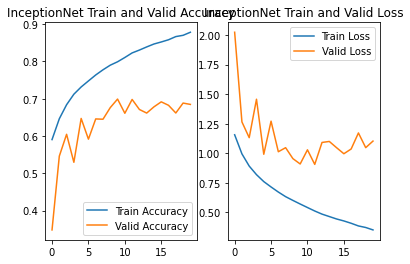

In [51]:
plt.subplot(1,2,1)
plt.plot(acc_inception, label = 'Train Accuracy')
plt.plot(val_acc_inception, label = 'Valid Accuracy')
plt.title('InceptionNet Train and Valid Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss_inception, label = 'Train Loss')
plt.plot(val_loss_inception, label = 'Valid Loss')
plt.title('InceptionNet Train and Valid Loss')
plt.legend()
plt.show()

# ResNet

In [71]:
class ResNetBlock(Model):
    def __init__(self, filter1, filter2, strides, residual):
        super(ResNetBlock, self).__init__()
        self.filter1 = filter1
        self.filter2 = filter2
        self.strides = strides
        self.residual = residual

        self.basic_layer = keras.models.Sequential([
            keras.layers.Conv2D(filters=self.filter1, kernel_size=(3,3), strides=self.strides, padding='same', use_bias=False),
            # 第一个conv步长stride
            keras.layers.BatchNormalization(),
            keras.layers.Activation('relu'),
            keras.layers.Conv2D(filters=self.filter2, kernel_size=(3,3), strides=1, padding='same', use_bias=False),
            keras.layers.BatchNormalization()
        ])
        if self.residual:
            self.down_c = keras.layers.Conv2D(filters=self.filter2, kernel_size=(1,1), strides=self.strides, padding='same', use_bias=False)
            self.down_b = keras.layers.BatchNormalization()
            # 残差conv步长也是stride

        self.act = keras.layers.Activation('relu')

    def call(self, inputs, training=None, mask=None):
        # inputs [batch, height, width, channel]
        residual = inputs
        x = self.basic_layer(inputs)
        # x [batch, height/self.strides, width/self.strides, self.filter2]
        if self.residual:
            residual = self.down_c(inputs)
            residual = self.down_b(residual)
            # residual [batch, height / self.strides, width/self.strides, self.filter2]

        y = self.act(x + residual)
        # x和residual 维度相同直接相加
        return y

In [72]:
class ResNetModel(Model):
    def __init__(self, block_num_list, initial_filters = 64):
        super(ResNetModel, self).__init__()
        self.block_num_list = block_num_list
        self.block_num = len(self.block_num_list)
        self.initial_filters = initial_filters
        self.out_filters = self.initial_filters
        self.c1 = keras.layers.Conv2D(filters=self.initial_filters, kernel_size=(3,3), strides=1, padding='same', use_bias=False)
        self.b1 = keras.layers.BatchNormalization()
        self.act1 = keras.layers.Activation('relu')

        self.blocks = keras.models.Sequential()
        for block_id in range(self.block_num):
            for layer_id in range(block_num_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResNetBlock(filter1=self.initial_filters, filter2=self.initial_filters, strides=2, residual=True)
                    # 不是第一个block的所有block的第一个layer是 维度不同的残差 strides = 2 residual = True
                else:
                    block = ResNetBlock(filter1=self.initial_filters, filter2=self.initial_filters, strides=1, residual=False)
                    # 第一个block的两个layer和其他所有block的第二个layer都是维度相同的直接残差 strides = 1 residual = False
                self.blocks.add(block)
            self.initial_filters = self.initial_filters * 2
            # 滤波器维度变为两倍
        self.global_pool = keras.layers.GlobalAveragePooling2D()
        self.output_proj = keras.layers.Dense(units=10,activation='softmax')

    def call(self, inputs, training=None, mask=None):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.act1(x)

        x = self.blocks(x)
        x = self.global_pool(x)

        y = self.output_proj(x)
        return y

In [73]:
resNet18 = ResNetModel(block_num_list=[2,2,2,2],initial_filters=64)

In [74]:
resNet18.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

In [75]:
checkpoint_save_path_resnet = 'tensorflow_study/chapter5/model_dir/simple_model/resnet_{epoch:02d}-{val_loss:.2f}.ckpt'

cp_callback_resnet = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_save_path_resnet,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
)

In [76]:
history_resnet = InceptionModel.fit(x_train, y_train,batch_size=256,epochs=20,validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback_resnet])

Epoch 1/20
196/196 [==============================] - 5s 26ms/step - loss: 0.3428 - sparse_categorical_accuracy: 0.8806 - val_loss: 1.0670 - val_sparse_categorical_accuracy: 0.6907
Epoch 2/20
196/196 [==============================] - 4s 23ms/step - loss: 0.3264 - sparse_categorical_accuracy: 0.8864 - val_loss: 1.3307 - val_sparse_categorical_accuracy: 0.6502
Epoch 3/20
196/196 [==============================] - 4s 22ms/step - loss: 0.3163 - sparse_categorical_accuracy: 0.8906 - val_loss: 1.3203 - val_sparse_categorical_accuracy: 0.6401
Epoch 4/20
196/196 [==============================] - 5s 23ms/step - loss: 0.3001 - sparse_categorical_accuracy: 0.8958 - val_loss: 1.0774 - val_sparse_categorical_accuracy: 0.6999
Epoch 5/20
196/196 [==============================] - 5s 23ms/step - loss: 0.2866 - sparse_categorical_accuracy: 0.9017 - val_loss: 1.0711 - val_sparse_categorical_accuracy: 0.7050
Epoch 6/20
196/196 [==============================] - 5s 24ms/step - loss: 0.2769 - sparse_cate

In [77]:
acc_resnet = history_resnet.history['sparse_categorical_accuracy']
val_acc_resnet = history_resnet.history['val_sparse_categorical_accuracy']
loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']

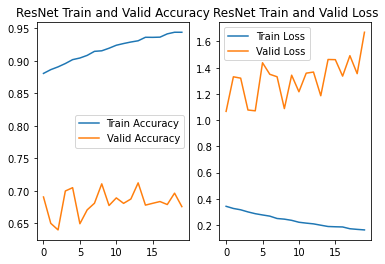

In [78]:
plt.subplot(1,2,1)
plt.plot(acc_resnet, label = 'Train Accuracy')
plt.plot(val_acc_resnet, label = 'Valid Accuracy')
plt.title('ResNet Train and Valid Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss_resnet, label = 'Train Loss')
plt.plot(val_loss_resnet, label = 'Valid Loss')
plt.title('ResNet Train and Valid Loss')
plt.legend()
plt.show()